In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "spam_assassin.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ganiyuolalekan/spam-assassin-email-classification-dataset",
  file_path,
)


In [3]:
df.columns

Index(['text', 'target'], dtype='object')

In [4]:
df['text'][0]

"From ilug-admin@linux.ie Mon Jul 29 11:28:02 2002 Return-Path: <ilug-admin@linux.ie> Delivered-To: yyyy@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) by phobos.labs.netnoteinc.com (Postfix) with ESMTP id A13D94414F for <jm@localhost>; Mon, 29 Jul 2002 06:25:11 -0400 (EDT) Received: from phobos [127.0.0.1] by localhost with IMAP (fetchmail-5.9.0) for jm@localhost (single-drop); Mon, 29 Jul 2002 11:25:11 +0100 (IST) Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g6RHn7i17130 for <jm-ilug@jmason.org>; Sat, 27 Jul 2002 18:49:07 +0100 Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA25016; Sat, 27 Jul 2002 18:45:03 +0100 X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1] claimed to be lugh Received: from mail1.mail.iol.ie (mail1.mail.iol.ie [194.125.2.192]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id SAA24977 f

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
x = np.array(df['text'])
y = np.array(df['target'])

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size = 0.8 , random_state= 23)

In [8]:
data_convert_pipeline = Pipeline([
    ("tf-idf" , TfidfVectorizer(
        lowercase=True,
        token_pattern=r'[a-zA-Z0-9]+'
    )),
    ("log_reg", LogisticRegression())
    
])

In [9]:
data_convert_pipeline.fit(x_train , y_train)

,steps,"[('tf-idf', ...), ('log_reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [10]:
cross_val_score(data_convert_pipeline , x_train , y_train , cv = 3 , scoring="precision")

array([0.9875    , 0.98985801, 0.99787234])

In [11]:
cross_val_score(data_convert_pipeline , x_train , y_train , cv=3 , scoring="accuracy" )

array([0.97542044, 0.98576052, 0.97540453])

In [12]:
cross_val_score(data_convert_pipeline , x_train , y_train , cv = 3 , scoring="f1")

array([0.96146045, 0.97795591, 0.96106557])

In [13]:
svc_pipeline = Pipeline([
    ("tf-idf" , TfidfVectorizer(
        lowercase=True,
        token_pattern=r'[a-zA-Z0-9]+'
    )),
    ("svc" , SVC())
])

In [14]:
svc_pipeline.fit(x_train , y_train)

,steps,"[('tf-idf', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [15]:
methods = ["accuracy" , "f1" , "precision"]

for method in methods:
    score = cross_val_score(svc_pipeline , x_train , y_train , cv=3 , scoring = method)
    print(score)

[0.98318241 0.99417476 0.98576052]
[0.9740519  0.99108028 0.97777778]
[0.98387097 0.99206349 1.        ]


In [16]:
y_train_pred = svc_pipeline.predict(x_train)

In [ ]:


cm = confusion_matrix(y_train , y_train_pred)


print(cm)

[[3118    1]
 [   9 1508]]


In [20]:
print(y_train_pred)

[0 0 1 ... 0 0 0]


In [21]:
print(y_train)

[0 0 1 ... 0 0 0]


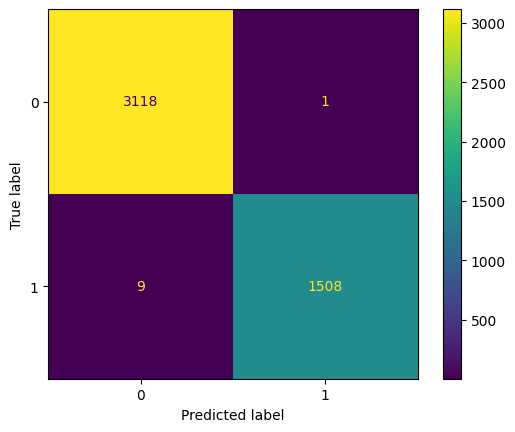

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm )
disp.plot()